# 数据处理模板

## 预设

### 导入库

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from utils import *

### 全局参数

In [28]:
StatisticsDataFilePath = 'data/西安城市形象编码词表_数量分布.pkl'
DataFilePath = 'data/西安城市形象数据.pkl'

### 全局设置

In [29]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basic/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


## 函数工具

In [30]:
# pandas 获取平台总数统计
def get_app_time_counts(df_data, group_name, app_name = None):
    if not app_name:
        return df_data.groupby(group_name).agg('count').iloc[:,0].astype('Int64')
    return df_data[df_data['平台']==app_name].groupby(group_name).agg('count').iloc[:,0].astype('Int64')

In [31]:
# pandas 获取平台点赞数统计（或其他任意数字）
def get_app_sum_counts(df_data, group_name, app_name = None, sum_target_volume_name = '点赞数'):
    if not app_name:
        return df_data.groupby(group_name).agg('sum').loc[:,sum_target_volume_name].astype('Int64')
    return df_data[df_data['平台']==app_name].groupby(group_name).agg('sum').loc[:,sum_target_volume_name].astype('Int64')

## 数据读取

In [32]:
data = pd.read_pickle(DataFilePath)
# data = data.sample(10).reset_index(drop=True)
data.shape

(277945, 9)

In [33]:
data = data[data['发布时间月份']>'2017-07']
data.shape

(276586, 9)

In [34]:
data = data[data['发布时间月份']<='2022-07']
data.shape

(275789, 9)

In [35]:
dictionary_data_statistics = pd.read_pickle(StatisticsDataFilePath)

## 数据处理

In [35]:
# 分割统计（按时间段）
data_time_count = pd.DataFrame()
data_time_count['总数'] = get_app_time_counts(data, '发布时间_group')
for app_name in ['豆瓣','知乎','微博']:
    data_time_count[app_name] = get_app_time_counts(data, '发布时间_group', app_name)

In [43]:
# 分割统计（按字符串）
data_time_count = pd.DataFrame()
data_time_count['总数'] = get_app_time_counts(data, '发布时间月份')
for app_name in ['豆瓣','知乎','微博']:
    data_time_count[app_name] = get_app_time_counts(data, '发布时间月份', app_name)
data_time_count = data_time_count.fillna(0)


In [47]:
# 点赞统计（按月）
data_vote_count = pd.DataFrame()
data_vote_count['总数'] = get_app_sum_counts(data, '发布时间月份')
for app_name in ['豆瓣','知乎','微博']:
    data_vote_count[app_name] = get_app_sum_counts(data, '发布时间月份', app_name)
data_vote_count = data_vote_count.fillna(0)

/var/folders/pd/tl2_nnd51j11dlh8x31_rxqh0000gn/T/ipykernel_23598/4291104982.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df_data.groupby(group_name).agg('sum').loc[:,sum_target_volume_name].astype('Int64')
/var/folders/pd/tl2_nnd51j11dlh8x31_rxqh0000gn/T/ipykernel_23598/4291104982.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df_data[df_data['平台']==app_name].groupby(group_name).agg('sum').loc[:,sum_target_volume_name].astype('Int64')
/var/folders/pd/tl2_nnd51j11dlh8x31_rxqh0000gn/T/ipykernel_23598/4291104982.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.

In [45]:
data.groupby('平台').agg('count')

,内容,发布时间,点赞数,收藏数,转发数,user_tag,评论数,发布时间月份
平台,,,,,,,,
微博,256110,256110,256110,256110,256110,256110,256110,256110
知乎,18509,18509,18509,18509,18509,18509,18509,18509
豆瓣,1170,1170,1170,1170,1170,1170,1170,1170


## 数据展示

In [42]:
data_to_show = data
data_to_show.sample(10)

,内容,发布时间,点赞数,收藏数,转发数,user_tag,平台,评论数,发布时间月份
188726,基本所有朋友都叫我快回西安哎就，哎,2021-07-16 23:38:00,1,0,0,5844265068,微博,0,2021-07
121480,西安新植物园,2020-04-12 23:35:00,0,0,0,1399274693,微博,4,2020-04
47903,#西安##西安雾霾#这样的天气，我们已经习惯了L带枪出巡prpr的微博视频,2018-12-02 23:51:00,1,0,0,3178512974,微博,0,2018-12
176539,晚安#晚安·西安##晚安，这座城#人生最大的遗憾，是我本可以，有些人在打算做一件事时，总是找...,2021-04-30 23:52:00,0,0,0,2231553400,微博,0,2021-04
232080,我是陕西人，西安居住，所在企业老板是河南人。郑州和西安，宜居西安更好些。至于城市负面形象，不...,2021-09-23 11:42:00,1,0,0,https://www.zhihu.com/people/zhang-zhi-qiang-6...,知乎,0,2021-09
125212,【西安接种门诊已全面恢复 需提前网上预约】疫苗分为一类疫苗和二类疫苗。一类疫苗为国家免疫规划...,2020-04-26 23:10:00,0,0,0,3543268681,微博,0,2020-04
23607,圣托里「SANTORIFLORA」等待您的加入7月1号～7号花艺课程请咨询客服：131302...,2018-06-22 23:57:00,0,0,0,2992875253,微博,0,2018-06
231699,除了90%以上人都说难吃的，基本是真难吃。其它的大多是吃不惯，我妈到了江浙那边也不爱吃那边的...,2022-06-09 13:18:00,0,0,0,https://www.zhihu.com/people/,知乎,0,2022-06
240956,我的朋友被困西安已经有一段时间了，现在只能蜗居到酒店里不能出门，还好酒店给管饭，就是住宿费和...,2022-01-06 09:23:00,0,0,0,https://www.zhihu.com/people/xuan-yuan-luo-yu-6,知乎,0,2022-01
72469,西安多市民辛苦买房却遇烂尾之痛烂尾楼之殇谁来解决？￼西安铁检1个月前46评论来源：华商网-华...,2019-04-14 23:34:00,0,0,0,5867854144,微博,0,2019-04


## 数据可视化

### 总数统计

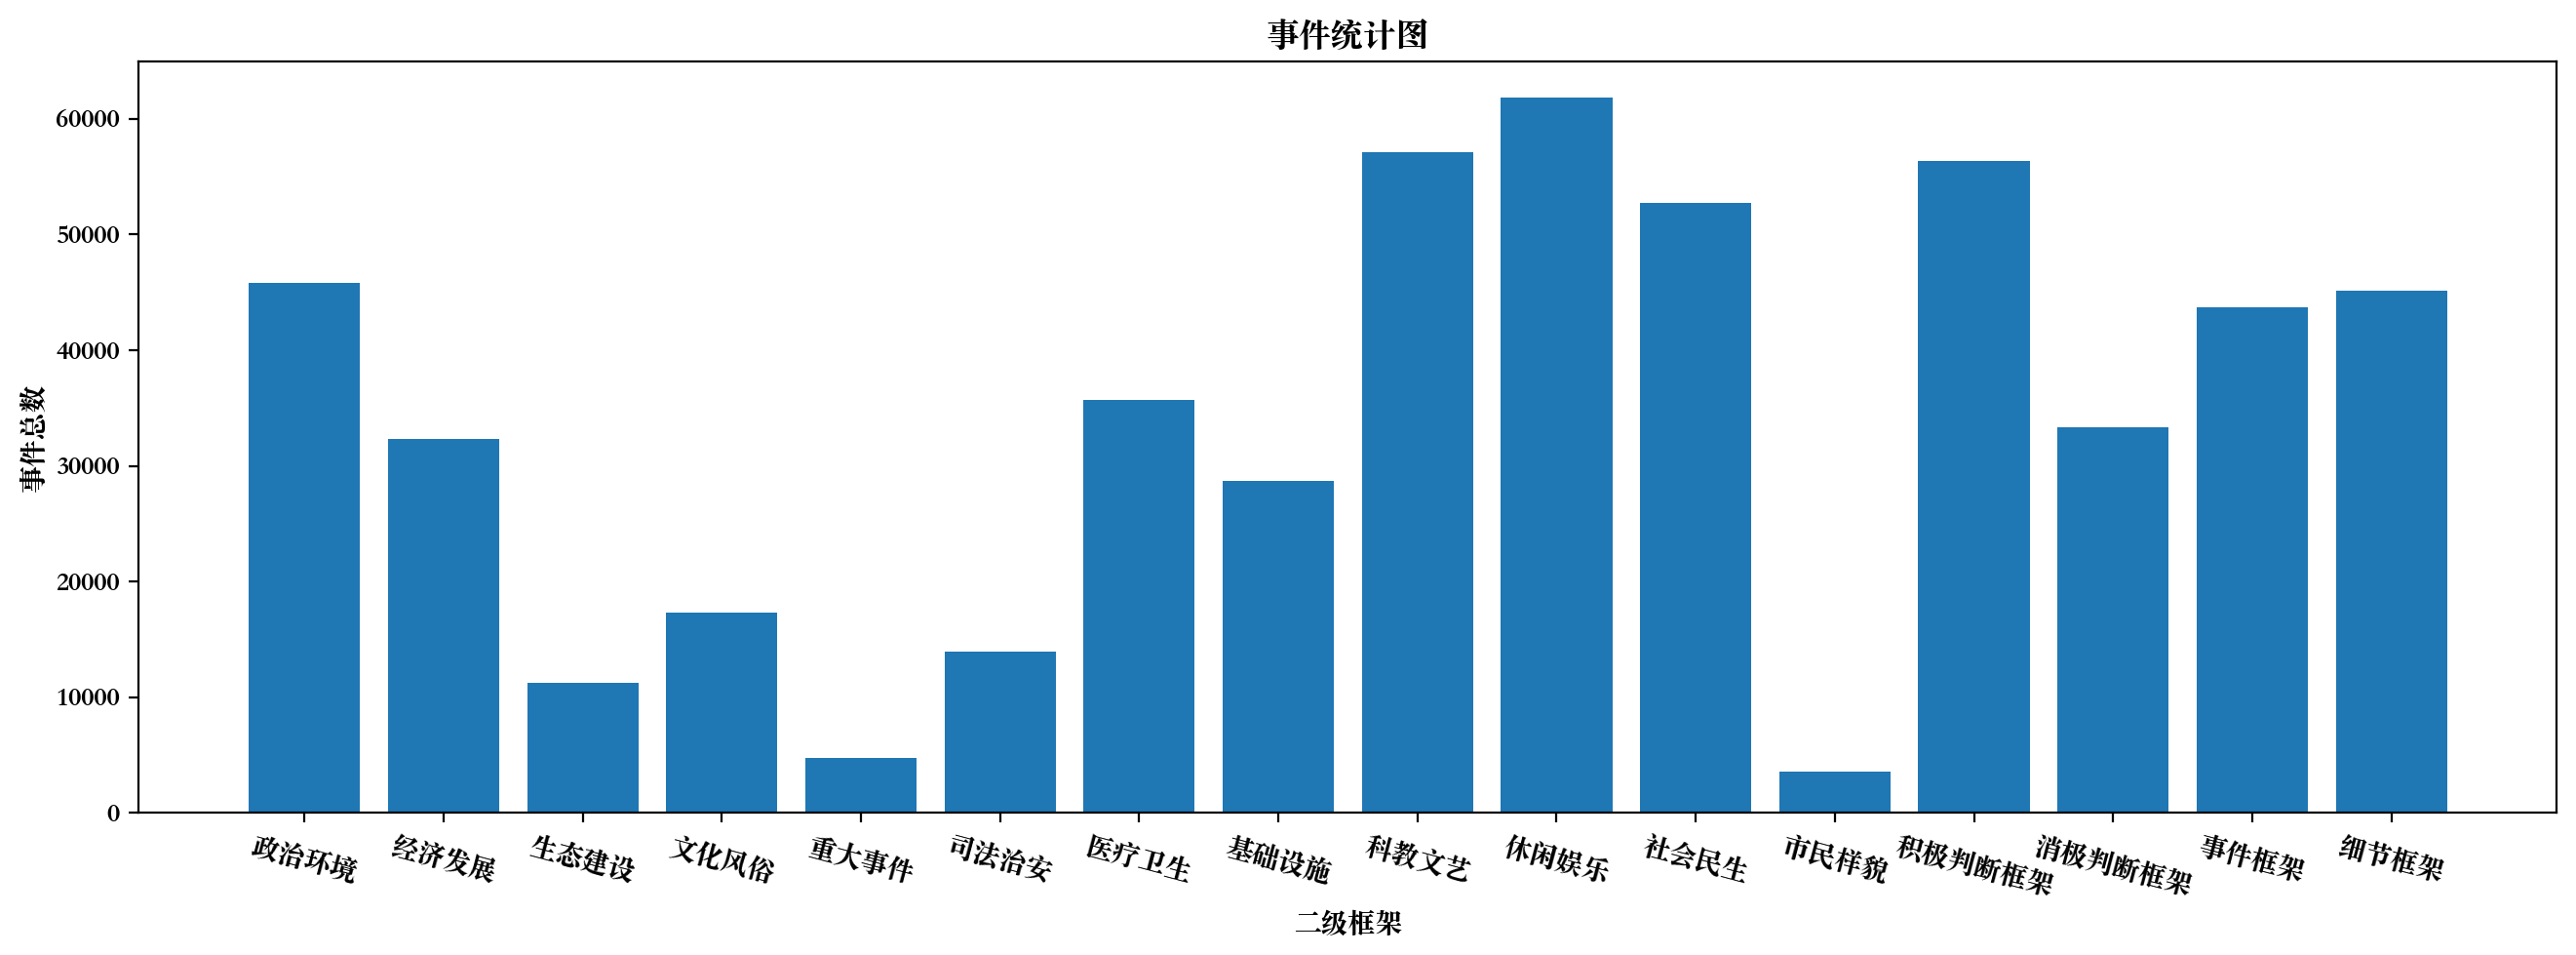

In [36]:
df_to_vis = dictionary_data_statistics
fig, ax = plt.subplots(figsize=(16, 5))
labels = df_to_vis.index
counts = df_to_vis['总数']
ax.bar(labels, counts)
ax.set_xlabel('二级框架')
ax.set_ylabel('事件总数')
ax.set_title('事件统计图')
plt.xticks(rotation=-15)    # 设置x轴标签旋转角度
plt.show()

In [37]:
df_to_vis

,总数,豆瓣总数,微博总数,知乎总数
政治环境,45815,281,39741,5793
经济发展,32339,276,28331,3732
生态建设,11248,78,10292,878
文化风俗,17308,382,15576,1350
重大事件,4728,18,4590,120
司法治安,13921,27,13491,403
医疗卫生,35680,120,33128,2432
基础设施,28661,329,26307,2025
科教文艺,57104,378,53025,3701
休闲娱乐,61831,611,58796,2424


In [38]:
df_to_vis.agg('sum')

总数      543558
豆瓣总数      4105
微博总数    496378
知乎总数     43075
dtype: int64

### 时间分割统计

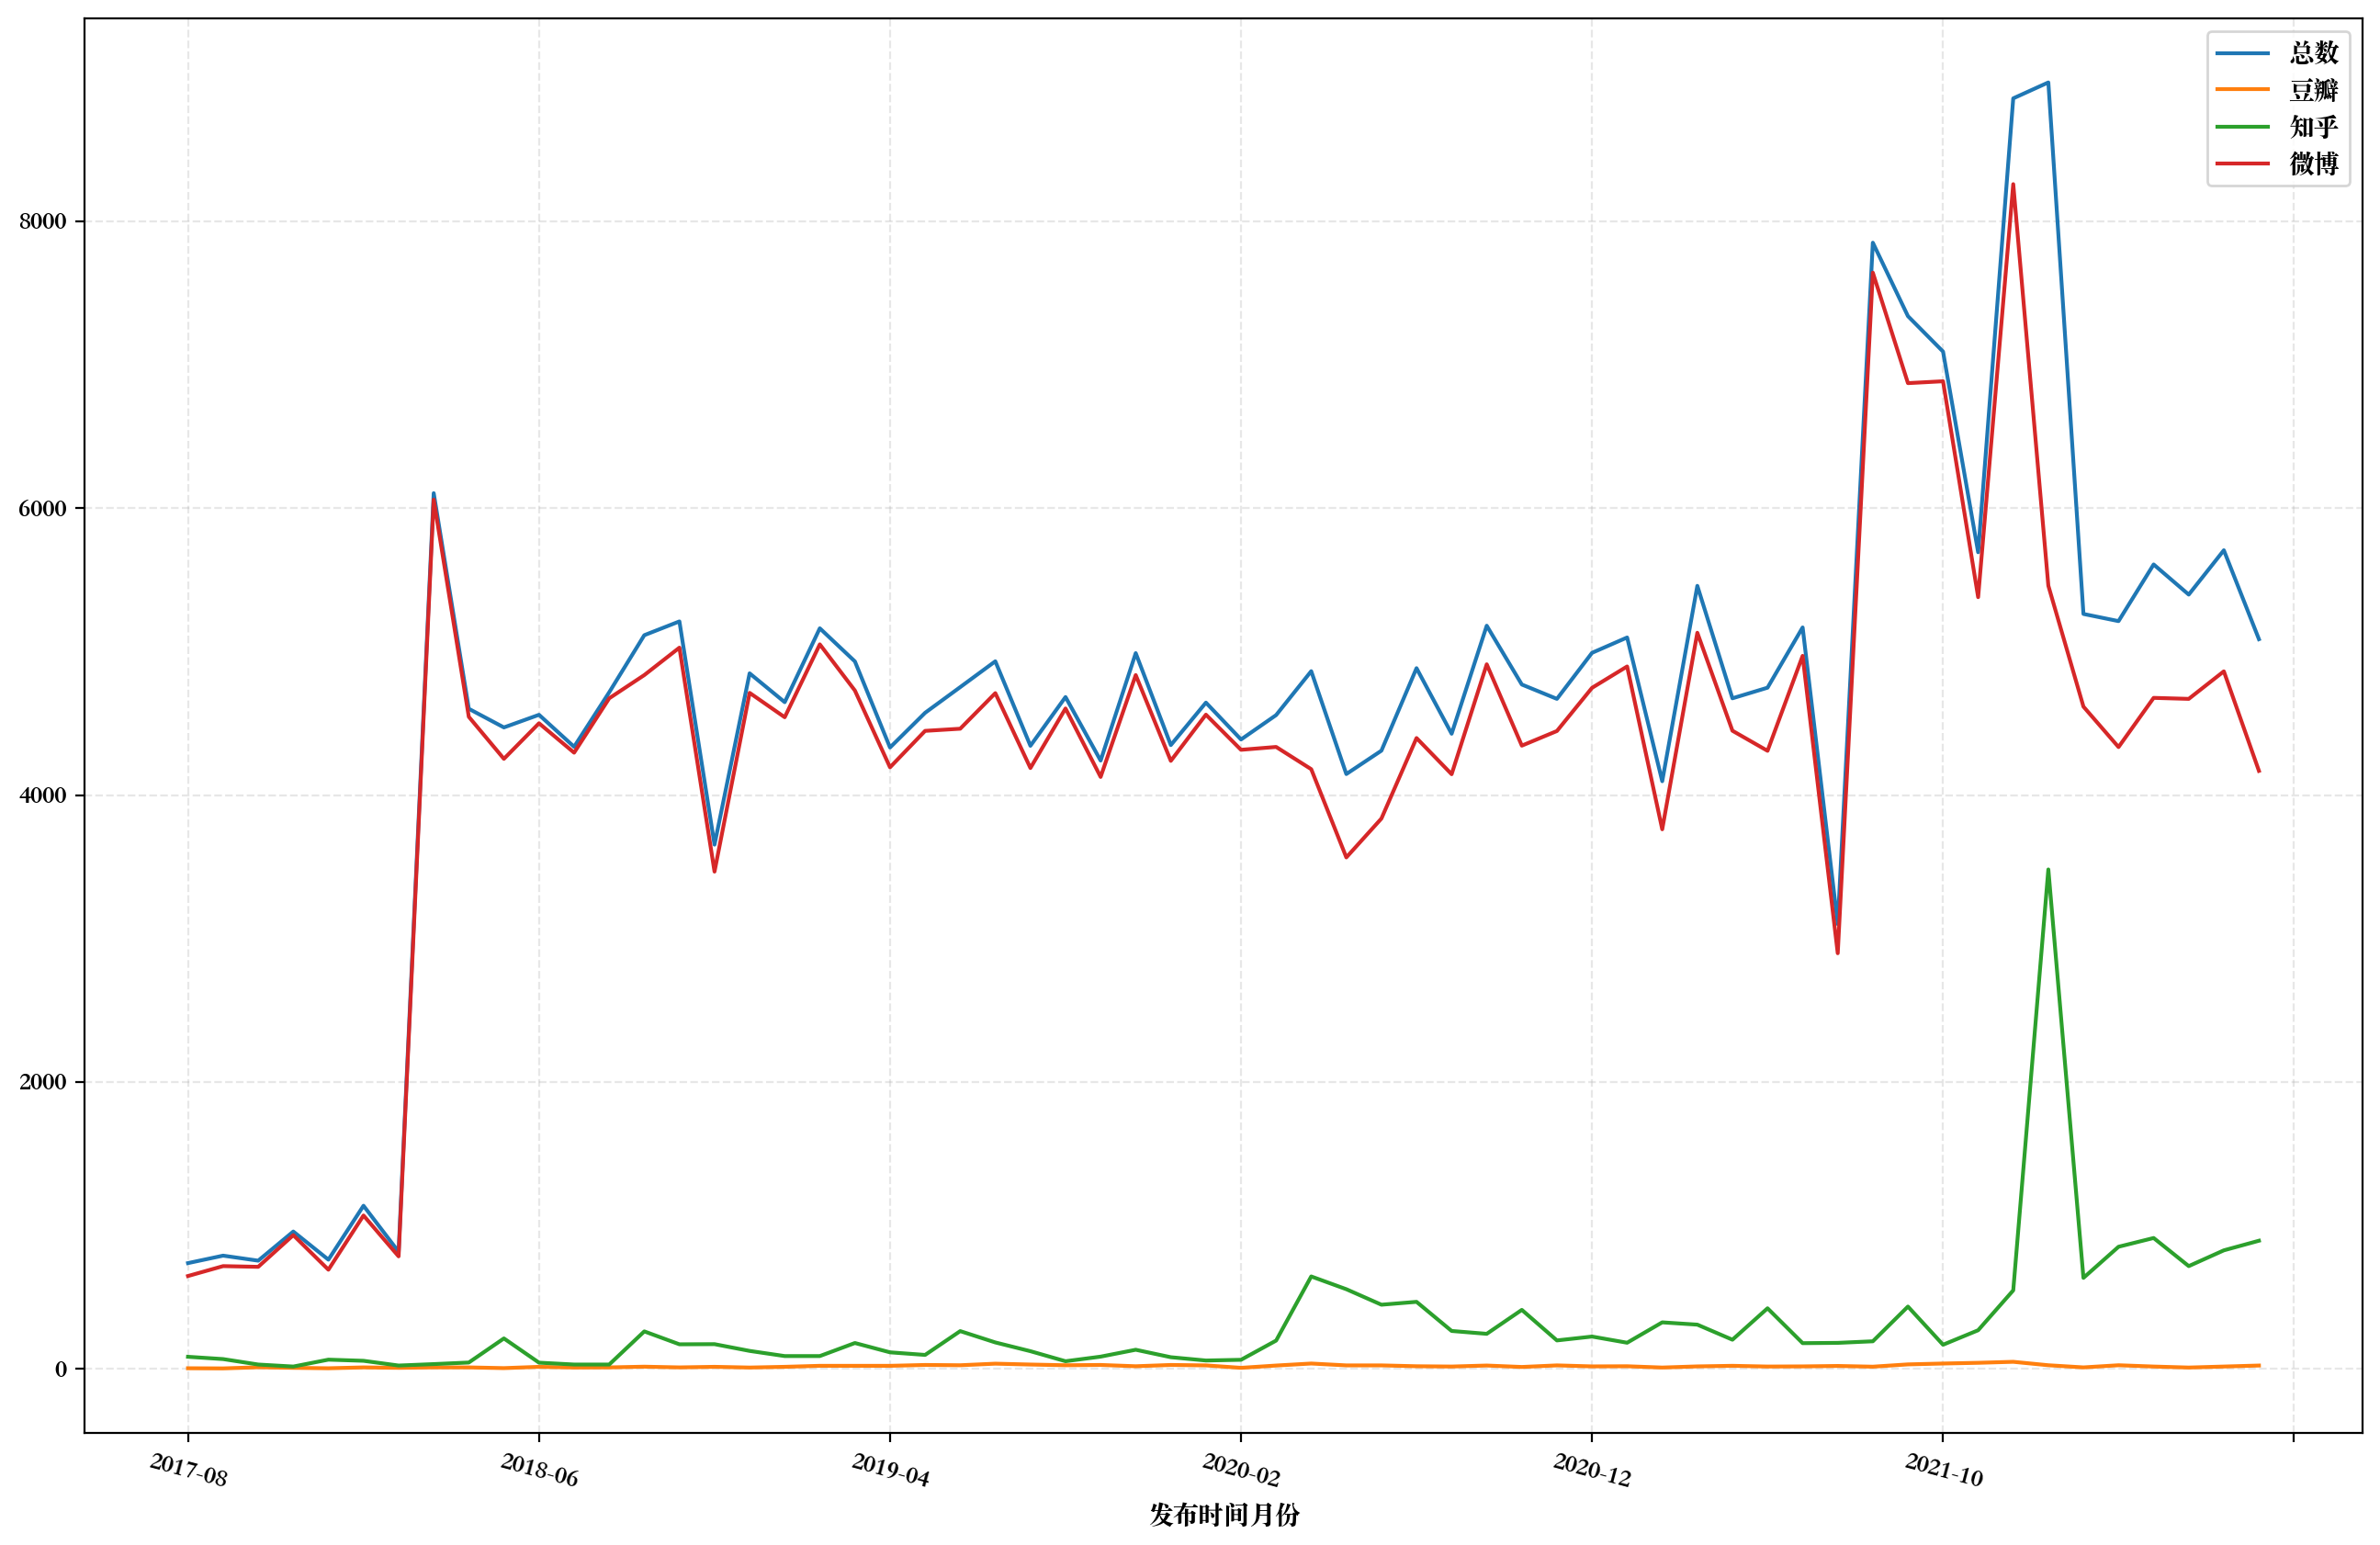

In [44]:
ax = data_time_count[data_time_count.index>='2017-08'].loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
# plt.xlim((pd.Timestamp('2021-11'), pd.Timestamp('2022-9')))
# plt.xticks(pd.date_range(start ='2021-11', end = '2022-9', freq='M'))
plt.xticks(rotation=-15) 
plt.show()

In [46]:
data_time_count[data_time_count['微博']>6000]

,总数,豆瓣,知乎,微博
发布时间月份,,,,
2018-03,6105,11,34,6060
2021-08,7851,16,193,7642
2021-09,7339,32,435,6872
2021-10,7092,38,169,6885
2021-12,8857,50,548,8259


### 点赞数统计

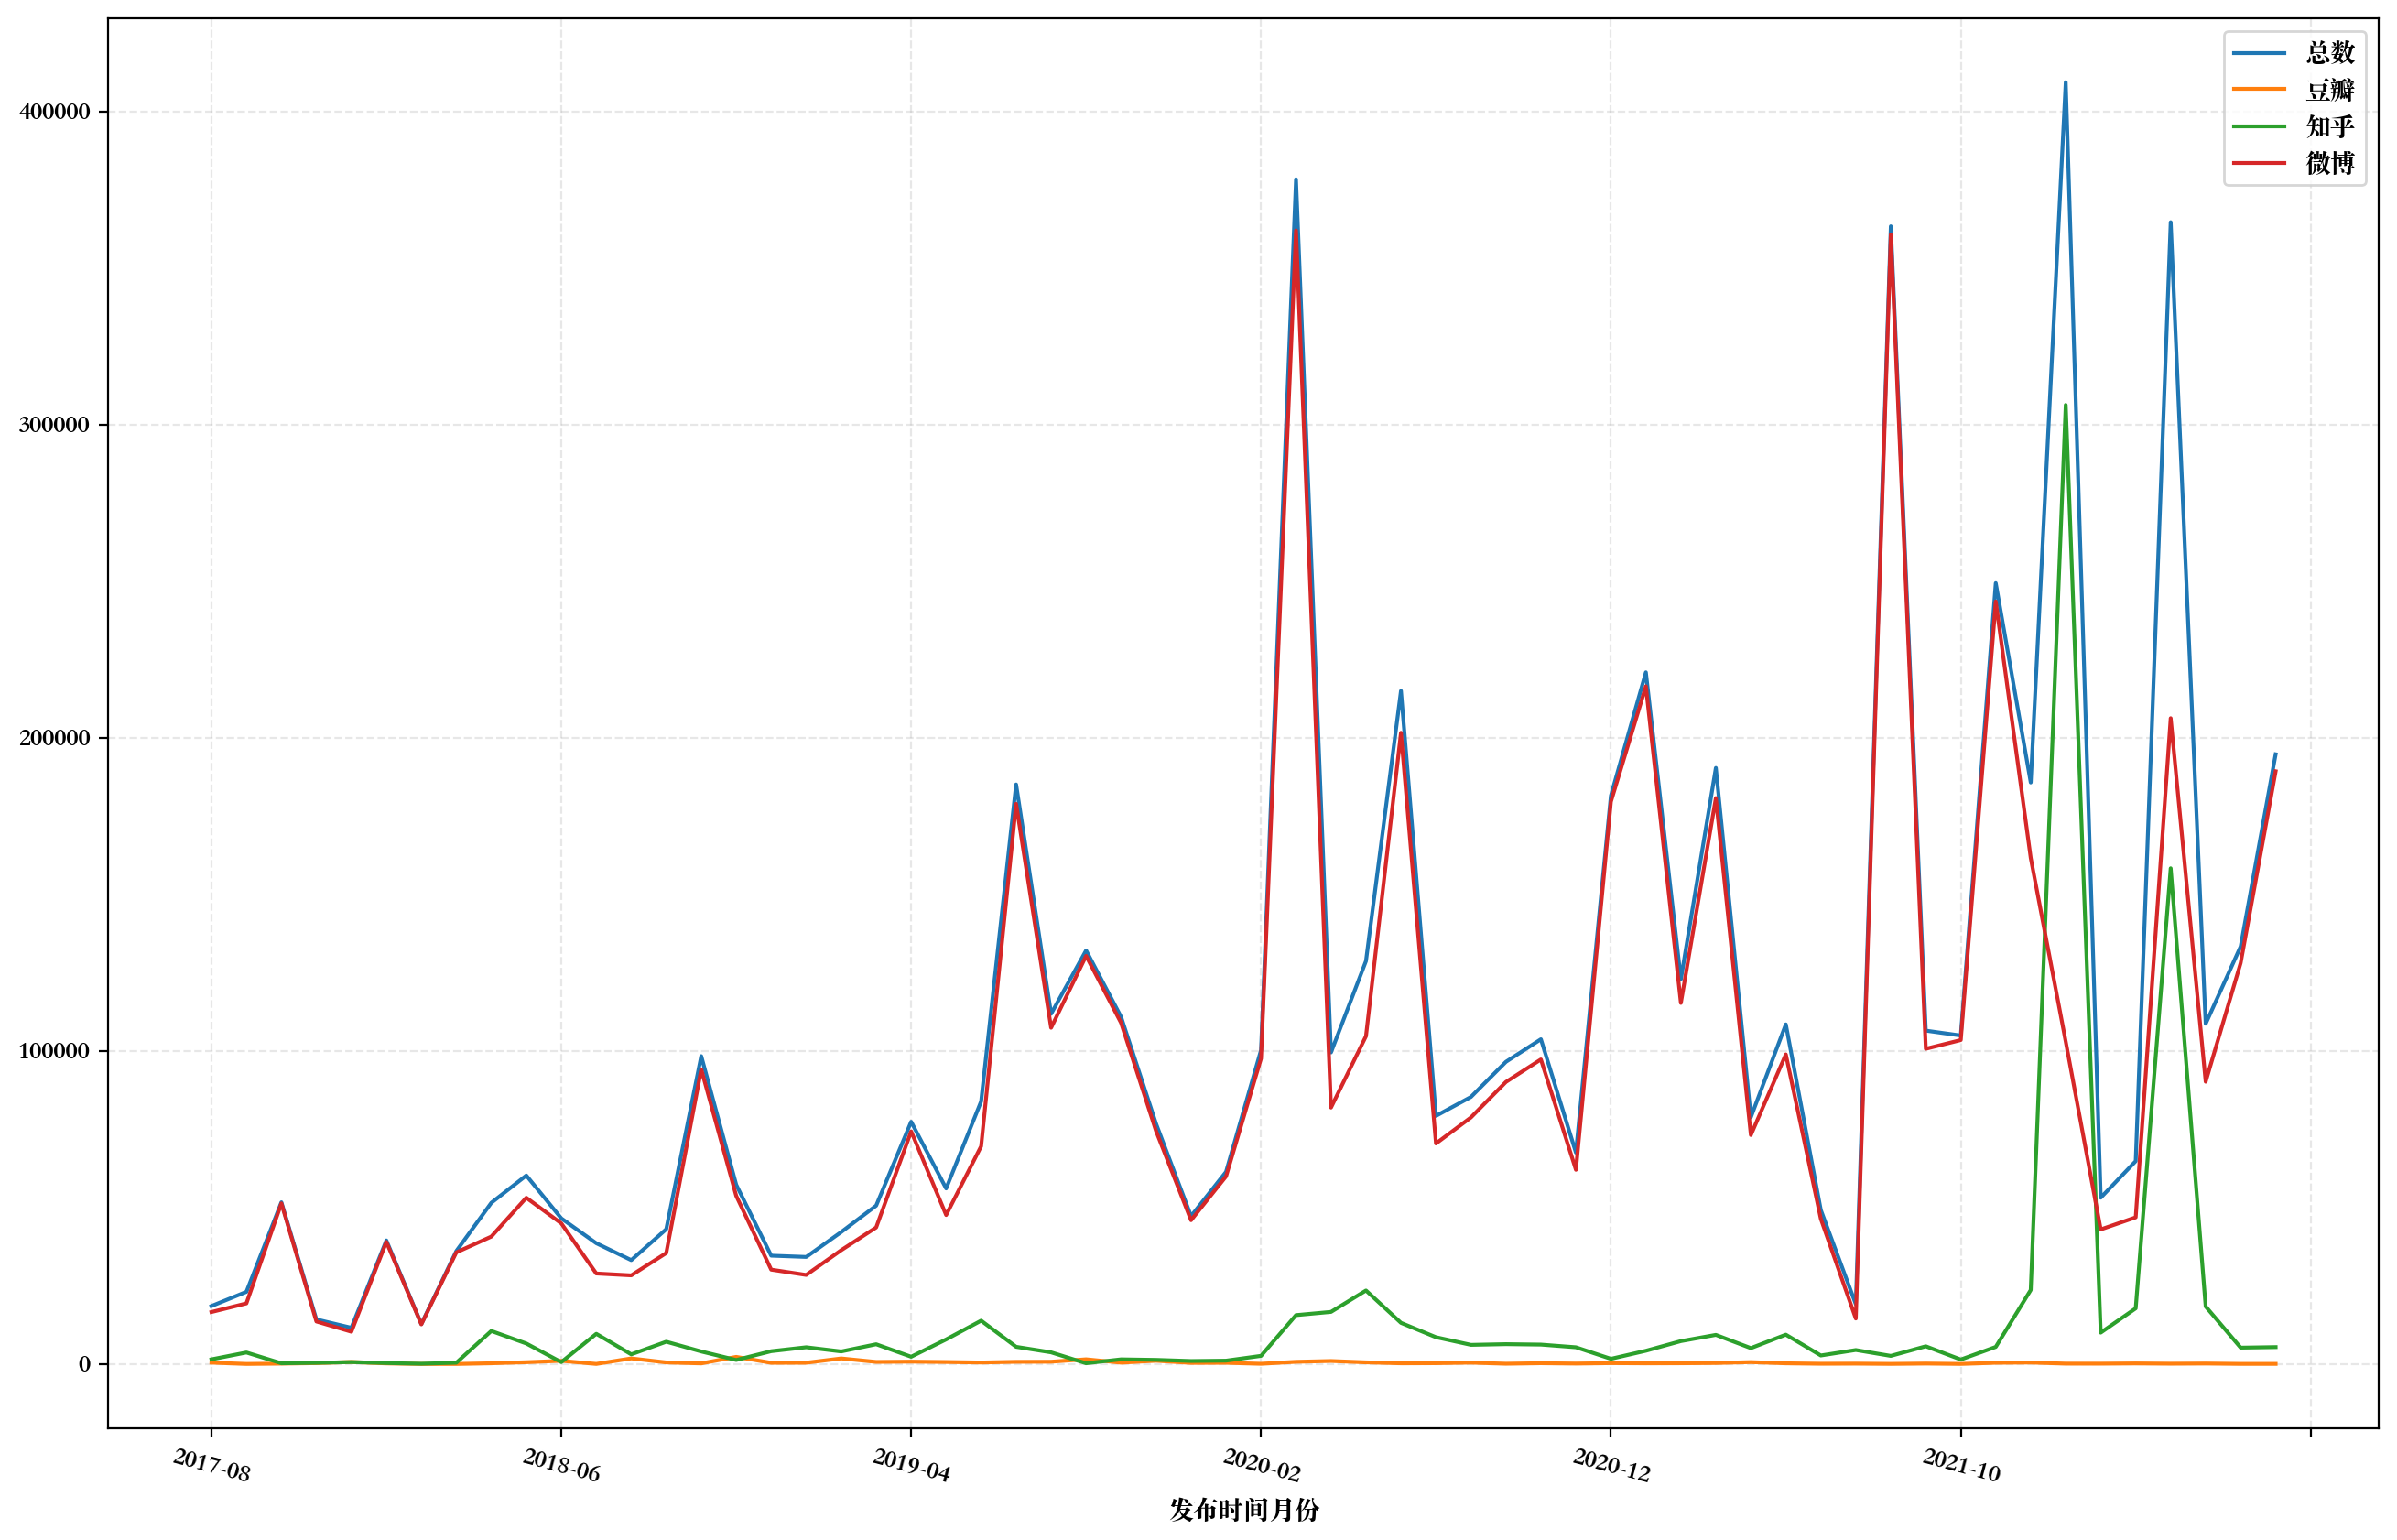

In [48]:
ax = data_vote_count.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
# plt.xlim((pd.Timestamp('2021-11'), pd.Timestamp('2022-9')))
# plt.xticks(pd.date_range(start ='2021-11', end = '2022-9', freq='M'))
plt.xticks(rotation=-15) 
plt.show()

## 数据保存